### Imports

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

### Reading data

In [2]:
data_path = "../data/lab_2/car_crashes.xlsx"

In [3]:
df = pd.read_excel(data_path)
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,True,False,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,A-4996,MapQuest,201.0,2,2016-08-01 11:35:41,2016-08-01 12:05:41,0.00,Accident on Cold Springs Rd at Middletown Rd.,Cold Springs Rd,R,...,False,False,False,False,False,False,False,False,Day,Day
4996,A-4997,MapQuest,201.0,2,2016-08-01 11:41:23,2016-08-01 12:26:23,0.00,Accident on Travis Blvd at Holiday Ln.,Travis Blvd,R,...,False,False,False,False,False,False,True,False,Day,Day
4997,A-4998,MapQuest,201.0,2,2016-08-01 11:57:27,2016-08-01 12:42:27,0.00,Accident on River Rd at Orchard Rd.,River Rd,L,...,False,False,False,False,False,False,False,False,Day,Day
4998,A-4999,MapQuest,201.0,2,2016-08-01 12:00:54,2016-08-01 12:30:54,0.00,Accident on Marconi Ave at Bell St.,Bell St,R,...,False,False,False,False,False,False,False,False,Day,Day


### Functions

In [166]:
def mean(arr):
    return momentum(arr, 1)

def median(arr):
    arr = sorted(arr)
    mid1 = len(arr) // 2
    mid2 = (len(arr) - 1) // 2
    return (arr[mid1] + arr[mid2]) / 2

def trunc_mean(arr, q):
    if q < 0 or q > 1:
        raise ValueError("Q must be between 0 and 1")
    arr = sorted(arr)
    lbound = int(len(arr) * q)
    rbound = len(arr) - lbound
    if lbound > rbound:
        raise ValueError("Too much to trunclate")
    return mean(arr[lbound:rbound])

def variance(arr):
    return momentum(arr, 2) - mean(arr) ** 2

def quantile(arr, q):
    if q < 0 or q > 1:
        raise ValueError("Q must be between 0 and 1")

    arr = sorted(arr)
    full_sum = 0
    for elem in arr:
        full_sum += elem
    left_sum = float(full_sum * q)

    i, sum = 0, 0
    while i < len(arr):
        if sum + arr[i] >= left_sum:
            break
        sum += arr[i]
        i += 1
    if i == len(arr):
        raise ValueError("Q must be between 0 and 1")
    lval = arr[i - 1] if i > 0 else arr[0]
    rval = arr[i]
    return (lval + rval) / 2

def momentum(arr, k: int):
    if k < 1:
        raise ValueError("K must be natural")
    sum = 0
    for elem in arr:
        sum += elem ** k
    return sum / len(arr)

def central_momentum(arr, k: int):
    if k < 1:
        raise ValueError("K must be natural")
    mn = mean(arr)
    sum = 0
    for elem in arr:
        sum += (elem - mn) ** k
    return sum / len(arr)

def check_equal(f1, f2, *args, eps=0.01, **kwargs):
    res1 = f1(*args, **kwargs)
    res2 = f2(*args, **kwargs)
    return abs(res1 - res2) < eps, res1, res2

### Comparison

In [148]:
data =  df["Visibility(mi)"].dropna().values
data

array([10., 10., 10., ..., 10.,  7.,  7.])

In [150]:
check_equal(np.mean, mean, data)

(True, 9.46561113352158, 9.46561113352158)

In [162]:
check_equal(np.median, median, data)

(True, 10.0, 10.0)

In [159]:
check_equal(stats.trim_mean, trunc_mean, data, 0.1)

(True, 9.94077620967742, 9.94077620967742)

In [161]:
check_equal(np.var, variance, data)

(True, 3.5586499996501475, 3.5586499996501573)

In [163]:
check_equal(np.quantile, quantile, data, 0.25)

(True, 10.0, 10.0)

##### Не нашёл в scipy/numpy функцию для подсчёта начального момента

In [167]:
check_equal(stats.moment, central_momentum, data, 2)

(True, 3.5586499996501475, 3.558649999649888)

### Graphs

In [81]:
arrs = [[], [], []]
names = ["mean", "median", "trunclated mean"]
xses = np.arange(1, 5)
for x in xses:
    loc = df.loc[df.Severity == x, "Visibility(mi)"]
    arrs[0].append(loc.mean())
    arrs[1].append(loc.median())
    arrs[2].append(stats.trim_mean(loc, 0.1))
print(arrs)

[[8.5, 9.397620689655172, 9.564372864812103, 9.2], [8.5, 10.0, 10.0, 10.0], [8.5, 9.909013605442176, 9.971393791844188, 9.2]]


/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

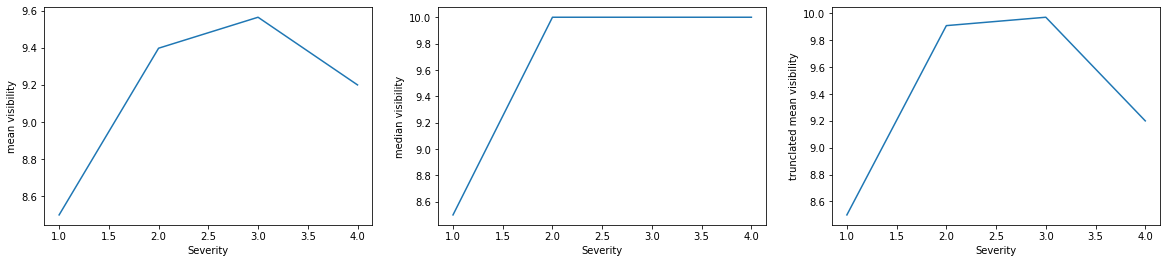

In [82]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20,4)
for i in range(3):
    axs[i].set_xlabel("Severity")
    axs[i].set_ylabel(f"{names[i]} visibility")
    sns.lineplot(xses, arrs[i], ax=axs[i])

##### Усеченное среднее отличается от среднего, значит в данных присутствуют выбросы
##### По графикам видно, что в целом видимость дороги не сильно влияет на тяжесть ДТП, но в происшествиях с наибольшей тяжестью средняя видимость дороги меньше. Если видимоть очень маленькая, водители, вероятно, сбавляют скорость и тяжесть аварий уменьшается

In [84]:
quantiles = np.array([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
severeties = np.arange(1, 5)
data = np.empty((severeties.shape[0], quantiles.shape[0]))
for i in range(severeties.shape[0]):
    loc = df.loc[df.Severity == severeties[i], "Wind_Speed(mph)"]
    data[i] = loc.quantile(quantiles)
print(data)

[[ 5.91  6.02  6.35  6.9   9.2  10.58 11.04]
 [ 3.5   4.6   5.8   8.1  11.5  15.   17.3 ]
 [ 3.5   4.6   6.9   9.2  12.7  15.   18.4 ]
 [ 5.8   5.8   5.8   6.9  10.4  13.16 14.08]]


/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/f/Code/linux-home/miniconda3/envs/vscode_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

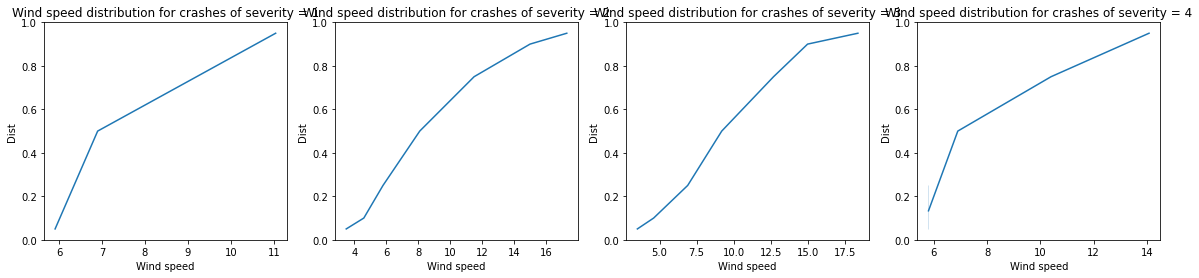

In [90]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(20,4)
for i in range(4):
    axs[i].set_xlabel("Wind speed")
    axs[i].set_ylabel("Dist")
    axs[i].set_ylim(0, 1)
    axs[i].set_title(f"Wind speed distribution for crashes of severity = {i + 1}")
    sns.lineplot(data[i], quantiles, ax=axs[i])

### Boxplots

<AxesSubplot:xlabel='Severity', ylabel='Wind_Speed(mph)'>

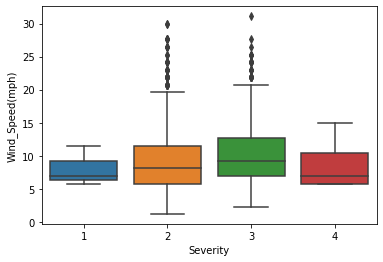

In [97]:
sns.boxplot(x="Severity", y="Wind_Speed(mph)", data=df)

##### Modes

In [114]:
modes = [df.loc[df.Severity == i, "Wind_Speed(mph)"].mode() for i in range(1, 5)]
modes

[0     5.8
 1     6.9
 2    11.5
 dtype: float64,
 0    5.8
 dtype: float64,
 0    8.1
 dtype: float64,
 0    5.8
 dtype: float64]